<a href="https://colab.research.google.com/github/RostislavB74/DS_HW7/blob/main/dz7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162735 sha256=1b811ad8dfc9d313a490c4f0df597e6074c517dd77027125eed2f313b8526e4f
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import pandas as pd
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise import Dataset, Reader
from surprise.prediction_algorithms import SVD, SVDpp, NMF, SlopeOne, KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, CoClustering, BaselineOnly, NormalPredictor
import datetime
import random
import time
import numpy as np
from surprise import (
    BaselineOnly,
    CoClustering,
    Dataset,
    KNNBaseline,
    KNNBasic,
    KNNWithMeans,
    NMF,
    NormalPredictor,
    SlopeOne,
    SVD,
    SVDpp,
)
from surprise.model_selection import cross_validate, KFold
from tabulate import tabulate
from pathlib import Path

In [ ]:
data = Dataset.load_builtin('ml-100k', prompt=False)


Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [ ]:
base_path = Path("/root/.surprise_data/ml-100k/ml-100k")
filelist =  list(map(lambda x: x.name, sorted(base_path.glob("u*"))))
types = {
    "test": "Test_files",
    "base": "Train_files"
}
for f, d in types.items():
  print(f"\n{d}:")
  print(list(filter(lambda x : x.endswith(f".{f}") ,filelist)))


Test_files:
['u1.test', 'u2.test', 'u3.test', 'u4.test', 'u5.test', 'ua.test', 'ub.test']

Train_files:
['u1.base', 'u2.base', 'u3.base', 'u4.base', 'u5.base', 'ua.base', 'ub.base']


In [ ]:
latest_url = "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
latest_zip_file = Path("ml-latest-small.zip")
if not latest_zip_file.exists():
  !wget -q {latest_url}
latest_zip_file
base_path = Path("/content/ml-latest-small/")
rating_csv = base_path.joinpath("ratings.csv")
tags_csv = base_path.joinpath("tags.csv")
movies_csv = base_path.joinpath("movies.csv")

In [ ]:
SEED = 42
algo_cv = {}
algo_split = {}
# Use the SVD algorithm.
algo = SVD(random_state=SEED)


# Інформація про датасет

# Інформація знаходиться в кількох файлах

In [ ]:
type(data)

surprise.dataset.DatasetAutoFolds

In [ ]:
from datetime import date

dater = None

raw_ratings = data.raw_ratings
print("Number of ratings:", len(raw_ratings))


print("\nTop 5 samples of raw ratings:")
for rating in raw_ratings[:5]:
  uid, iid, ur, timestamp = rating
  if timestamp:
    dater = date.fromtimestamp(int(timestamp))
  print(f"UserID: {uid:5}, ItemID: {iid:5}, UserRateForItem: {ur:5}, date: {dater}")

search_uid = uid
count_uid = 5
print(f"\nTop {count_uid} ratings of user: {search_uid}")

for rating in raw_ratings:
  uid, iid, ur, timestamp = rating
  if uid == search_uid:
    if timestamp:
      dater = date.fromtimestamp(int(timestamp))
    count_uid -= 1;
    print(f"UserID: {uid:5}, ItemID: {iid:5}, UserRateForItem: {ur:5}, date: {dater}")
    if count_uid <= 0:
      break

search_iid = iid
count_iid = 5
print(f"\nTop {count_iid} ratings of item: {search_iid}")

for rating in raw_ratings:
  uid, iid, ur, timestamp = rating
  if iid == search_iid:
    if timestamp:
      dater = date.fromtimestamp(int(timestamp))
    count_iid -= 1;
    print(f"UserID: {uid:5}, ItemID: {iid:5}, UserRateForItem: {ur:5}, date: {dater}")
    if count_iid <= 0:
      break

Number of ratings: 100000

Top 5 samples of raw ratings:
UserID: 196  , ItemID: 242  , UserRateForItem:   3.0, date: 1997-12-04
UserID: 186  , ItemID: 302  , UserRateForItem:   3.0, date: 1998-04-04
UserID: 22   , ItemID: 377  , UserRateForItem:   1.0, date: 1997-11-07
UserID: 244  , ItemID: 51   , UserRateForItem:   2.0, date: 1997-11-27
UserID: 166  , ItemID: 346  , UserRateForItem:   1.0, date: 1998-02-02

Top 5 ratings of user: 166
UserID: 166  , ItemID: 346  , UserRateForItem:   1.0, date: 1998-02-02
UserID: 166  , ItemID: 328  , UserRateForItem:   5.0, date: 1998-02-02
UserID: 166  , ItemID: 322  , UserRateForItem:   5.0, date: 1998-02-02
UserID: 166  , ItemID: 288  , UserRateForItem:   3.0, date: 1998-02-02
UserID: 166  , ItemID: 258  , UserRateForItem:   4.0, date: 1998-02-02

Top 5 ratings of item: 258
UserID: 26   , ItemID: 258  , UserRateForItem:   3.0, date: 1998-03-31
UserID: 66   , ItemID: 258  , UserRateForItem:   4.0, date: 1997-12-31
UserID: 207  , ItemID: 258  , UserR

In [ ]:
ratings_file = '/root/.surprise_data/ml-100k/ml-100k/u.data'

ratings_data = pd.read_csv(ratings_file, sep='\t', names=['userId', 'movieId', 'rating', 'timestamp'])

print("Рейтинги фільмів:")
print(ratings_data.head())

Рейтинги фільмів:
   userId  movieId  rating  timestamp
0     196      242       3  881250949
1     186      302       3  891717742
2      22      377       1  878887116
3     244       51       2  880606923
4     166      346       1  886397596


u.info -- кількість користувачів, елементів і оцінок у наборі даних u.

In [ ]:
info_file = '/root/.surprise_data/ml-100k/ml-100k/u.info'

info_data = pd.read_csv(info_file, sep='\t', names=['userId'])

print("кількість користувачів, елементів і оцінок у наборі даних u:")
print(info_data.head())



кількість користувачів, елементів і оцінок у наборі даних u:
           userId
0       943 users
1      1682 items
2  100000 ratings


In [ ]:
import pandas as pd

file_path = '/root/.surprise_data/ml-100k/ml-100k/u.item'

columns = [
    'movieId', 'title', 'release_date', 'video_release_date',
    'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
    'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
    'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
    'Sci-Fi', 'Thriller', 'War', 'Western'
]

movies_df = pd.read_csv(file_path, sep='|', encoding='latin-1', header=None, names=columns)

print(movies_df.head())


   movieId              title release_date  video_release_date  \
0        1   Toy Story (1995)  01-Jan-1995                 NaN   
1        2   GoldenEye (1995)  01-Jan-1995                 NaN   
2        3  Four Rooms (1995)  01-Jan-1995                 NaN   
3        4  Get Shorty (1995)  01-Jan-1995                 NaN   
4        5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1         1  ...        0          0       0        0   
1     

In [33]:
movies_df.title[172]

'Princess Bride, The (1987)'

In [34]:
file_path = '/root/.surprise_data/ml-100k/ml-100k/u.user'

columns = ['userId', 'age', 'gender', 'occupation', 'zip_code']

users_df = pd.read_csv(file_path, sep='|', header=None, names=columns)

print(users_df.head())


   userId  age gender  occupation zip_code
0       1   24      M  technician    85711
1       2   53      F       other    94043
2       3   23      M      writer    32067
3       4   24      M  technician    43537
4       5   33      F       other    15213


In [35]:
genre_file = '/root/.surprise_data/ml-100k/ml-100k/u.genre'
genre_data = pd.read_csv(genre_file, sep='\t', names=['genreId'])

print("Жанри фільмів")
print(genre_data.head())



Жанри фільмів
        genreId
0     unknown|0
1      Action|1
2   Adventure|2
3   Animation|3
4  Children's|4


In [36]:
file_path = '/root/.surprise_data/ml-100k/ml-100k/u.occupation'

with open(file_path, 'r') as file:
    occupations = file.readlines()

occupations = [occupation.strip() for occupation in occupations]

print(occupations)



['administrator', 'artist', 'doctor', 'educator', 'engineer', 'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer', 'librarian', 'marketing', 'none', 'other', 'programmer', 'retired', 'salesman', 'scientist', 'student', 'technician', 'writer']


In [37]:
num_ratings = len(data.raw_ratings)
print("Кількість рейтингів:", num_ratings)


Кількість рейтингів: 100000


#Будуємо модель матричної факторизації SVD


In [38]:
for i in range(1, 6):
    train_file = f'/root/.surprise_data/ml-100k/ml-100k/u{i}.base'
    test_file = f'/root/.surprise_data/ml-100k/ml-100k/u{i}.test'


    reader = Reader(line_format='user item rating timestamp', sep='\t')
    train_data = Dataset.load_from_file(train_file, reader=reader)
    test_data = Dataset.load_from_file(test_file, reader=reader)


    trainset = train_data.build_full_trainset()
    testset = test_data.build_full_trainset().build_testset()

    algo = SVD()

    algo.fit(trainset)

    predictions = algo.test(testset)
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    print(f"RMSE for u{i}.test:", rmse.round(4))
    print(f"MAE for u{i}.test:", mae.round(4))



RMSE: 0.9522
MAE:  0.7497
RMSE for u1.test: 0.9522
MAE for u1.test: 0.7497
RMSE: 0.9398
MAE:  0.7394
RMSE for u2.test: 0.9398
MAE for u2.test: 0.7394
RMSE: 0.9302
MAE:  0.7310
RMSE for u3.test: 0.9302
MAE for u3.test: 0.731
RMSE: 0.9313
MAE:  0.7340
RMSE for u4.test: 0.9313
MAE for u4.test: 0.734
RMSE: 0.9317
MAE:  0.7376
RMSE for u5.test: 0.9317
MAE for u5.test: 0.7376


Модель демонструє досить низькі значення RMSE і MAE для тестових даних, що є позитивним показником. Це свідчить про те, що модель рекомендацій добре прогнозує оцінки користувачів для нових елементів.

In [40]:
reader = Reader()

dataset = data.build_full_trainset()

algorithms = [SVD()]

for algorithm in algorithms:
    print(f"Evaluating {algorithm.__class__.__name__}...")
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=True)
    print(f"Mean RMSE for {algorithm.__class__.__name__}: {results['test_rmse'].mean()}")

Evaluating SVD...
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9368  0.9267  0.9359  0.9392  0.9377  0.9352  0.0044  
Fit time          1.38    1.62    1.67    1.68    1.73    1.62    0.12    
Test time         0.14    0.13    0.42    0.13    0.49    0.26    0.16    
Mean RMSE for SVD: 0.9352492968839613


In [41]:
def data_full_trainset(algo, data):
  algorithm_name = algo.__class__.__name__
  print(f"Algo: {algorithm_name}, UserID: {uid:5}, ItemID: {iid:5}, UserRateForItem: {ur:5}, date: {dater}")

  trainset = data.build_full_trainset()

  print("Number of train ratings:", len(list(trainset.all_ratings())))
  algo.fit(trainset)
  pred = algo.predict(uid, iid, r_ui=ur, verbose=True)

  testset = trainset.build_testset()
  print("Number of test ratings:", len(testset))

  predictions = algo.test(testset)

  accuracy.rmse(predictions, verbose=True)


data_full_trainset(algo, data)


Algo: SVD, UserID: 6    , ItemID: 258  , UserRateForItem:   2.0, date: 1997-12-28
Number of train ratings: 100000
user: 6          item: 258        r_ui = 2.00   est = 2.85   {'was_impossible': False}
Number of test ratings: 100000
RMSE: 0.6786


In [42]:
algorithms = [
    SVD(),
    SVDpp(cache_ratings=False),
    SVDpp(cache_ratings=True),
    NMF(),
    SlopeOne(),
    KNNBasic(),
    KNNWithMeans(),
    KNNWithZScore(),
    KNNBaseline(),
    CoClustering(),
    BaselineOnly(),
    NormalPredictor()
]

results = {}

for algo in algorithms:
    print(f"Evaluating {algo.__class__.__name__}...")
    cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    mean_rmse = sum(cv_results['test_rmse']) / len(cv_results['test_rmse'])
    mean_mae = sum(cv_results['test_mae']) / len(cv_results['test_mae'])
    mean_time = sum(cv_results['fit_time']) / len(cv_results['fit_time'])
    results[algo.__class__.__name__] = {'RMSE': mean_rmse, 'MAE': mean_mae, 'Time': mean_time}

for algo, metrics in results.items():
    print(f"{algo}: RMSE={metrics['RMSE']}, MAE={metrics['MAE']}, Time={metrics['Time']}")


Evaluating SVD...
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9302  0.9434  0.9265  0.9403  0.9353  0.9351  0.0062  
MAE (testset)     0.7313  0.7454  0.7302  0.7422  0.7376  0.7373  0.0059  
Fit time          1.46    1.40    2.20    3.12    1.56    1.95    0.65    
Test time         0.29    0.22    0.15    0.11    0.11    0.18    0.07    
Evaluating SVDpp...
Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9156  0.9143  0.9269  0.9285  0.9165  0.9203  0.0060  
MAE (testset)     0.7176  0.7193  0.7270  0.7288  0.7179  0.7221  0.0048  
Fit time          26.81   32.14   26.84   27.13   26.96   27.98   2.08    
Test time         5.89    5.12    5.28    4.97    5.47    5.35    0.32    
Evaluating SVDpp...
Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  

In [43]:
import time
import datetime
from tabulate import tabulate
np.random.seed(0)
random.seed(0)

kf = KFold(random_state=0)


In [44]:
algos = (
    SVD(random_state=0),
    SVDpp(random_state=0, cache_ratings=False),
    SVDpp(random_state=0, cache_ratings=True),
    NMF(random_state=0),
    SlopeOne(),
    KNNBasic(),
    KNNWithMeans(),
    KNNBaseline(),
    CoClustering(random_state=0),
    BaselineOnly(),
    NormalPredictor(),
)

results = {}

for algo in algos:
    start = time.time()
    out = cross_validate(algo, data, ["rmse", "mae"], kf)
    cv_time = str(datetime.timedelta(seconds=int(time.time() - start)))
    mean_rmse = "{:.3f}".format(np.mean(out["test_rmse"]))
    mean_mae = "{:.3f}".format(np.mean(out["test_mae"]))

    results[algo.__class__.__name__] = {'RMSE': mean_rmse, 'MAE': mean_mae, 'Time': cv_time}

header = ["Algorithm", "RMSE", "MAE", "Time"]
table = []

for algo, metrics in results.items():
    table.append([algo, metrics['RMSE'], metrics['MAE'], metrics['Time']])

print(tabulate(table, header, tablefmt="pipe"))


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity ma

In [45]:
results

{'SVD': {'RMSE': '0.934', 'MAE': '0.737', 'Time': '0:00:13'},
 'SVDpp': {'RMSE': '0.919', 'MAE': '0.721', 'Time': '0:02:16'},
 'NMF': {'RMSE': '0.963', 'MAE': '0.758', 'Time': '0:00:15'},
 'SlopeOne': {'RMSE': '0.946', 'MAE': '0.743', 'Time': '0:00:22'},
 'KNNBasic': {'RMSE': '0.980', 'MAE': '0.774', 'Time': '0:00:22'},
 'KNNWithMeans': {'RMSE': '0.951', 'MAE': '0.749', 'Time': '0:00:24'},
 'KNNBaseline': {'RMSE': '0.931', 'MAE': '0.733', 'Time': '0:00:26'},
 'CoClustering': {'RMSE': '0.963', 'MAE': '0.753', 'Time': '0:00:15'},
 'BaselineOnly': {'RMSE': '0.944', 'MAE': '0.748', 'Time': '0:00:05'},
 'NormalPredictor': {'RMSE': '1.518', 'MAE': '1.219', 'Time': '0:00:02'}}

In [46]:
algorithm_results = [(algo, float(results[algo]['RMSE']), float(results[algo]['MAE']), results[algo]['Time']) for algo in results]

sorted_results_rmse = sorted(algorithm_results, key=lambda x: x[1])
sorted_results_mae = sorted(algorithm_results, key=lambda x: x[2])
sorted_results_time = sorted(algorithm_results, key=lambda x: int(x[3].split(':')[0]) * 3600 + int(x[3].split(':')[1]) * 60 + int(x[3].split(':')[2]))



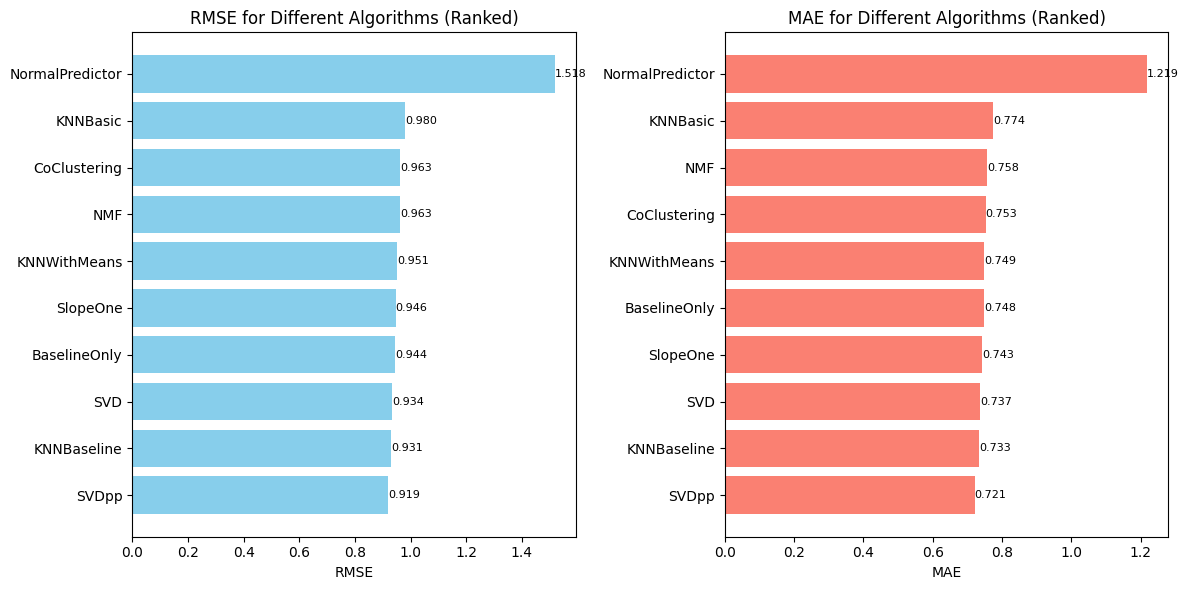

In [57]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
algorithms_rmse, rmse_values, *_ = zip(*sorted_results_rmse)
for i, (algorithm, rmse) in enumerate(zip(algorithms_rmse, rmse_values)):
    plt.text(rmse, i, f'{rmse:.3f}', ha='left', va='center', fontsize=8)
plt.barh(algorithms_rmse, rmse_values, color='skyblue')
plt.xlabel('RMSE')
plt.title('RMSE for Different Algorithms (Ranked)')

plt.subplot(1, 2, 2)
algorithms_mae, _, mae_values, *_ = zip(*sorted_results_mae)
for i, (algorithm, mae) in enumerate(zip(algorithms_mae, mae_values)):
    plt.text(mae, i, f'{mae:.3f}', ha='left', va='center', fontsize=8)
plt.barh(algorithms_mae, mae_values, color='salmon')
plt.xlabel('MAE')
plt.title('MAE for Different Algorithms (Ranked)')

plt.tight_layout()
plt.show()

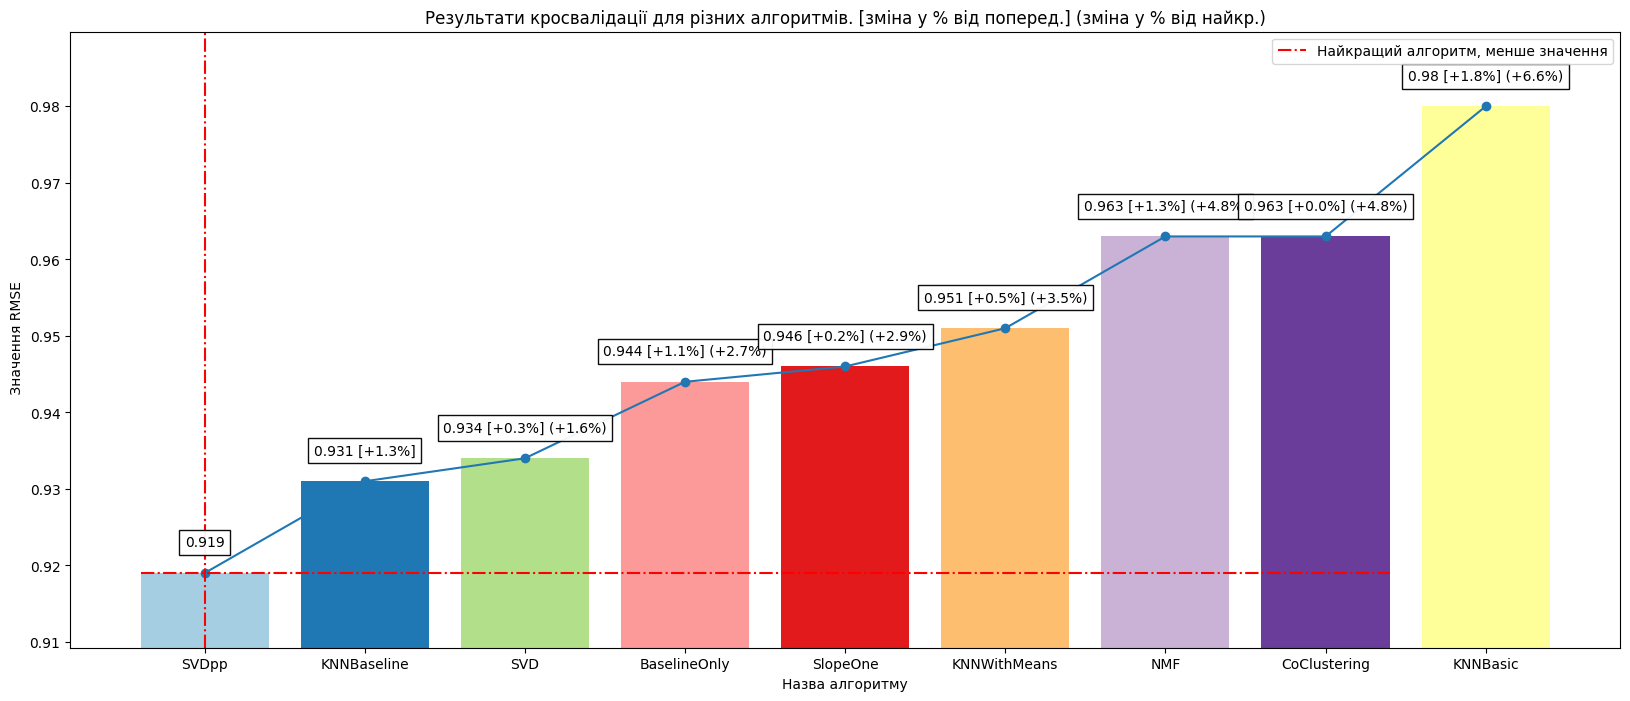

Найкращий алгоритм: SVDpp, зі значенням: 0.9190


In [58]:
def plot_algo_ranked(input_data: list, title_type: str="", ylabel_type: str="RMSE", column=None):

    x = range(len(input_data) - 1)
    if column is None:
        y = [v[1] for v in input_data[:-1]]
    else:
        y = [v[column] for v in input_data[:-1]]

    y = np.array(y)

    plt.figure(figsize=(20, 8))
    h_y = y[-1] -  y[0]
    max_y = y[-1] + h_y * 0.16
    min_y = y[0] - h_y * 0.16
    min_y = 0 if min_y < 0 else min_y
    plt.ylim(min_y, max_y)
    plt.title(f"Результати {title_type} для різних алгоритмів. [зміна у % від поперед.] (зміна у % від найкр.)")

    cmap = plt.get_cmap('Paired')
    num_colors = len(x)
    colors_map = [cmap(i / num_colors) for i in range(num_colors)]
    colors = colors_map

    bar_w = 0.8

    plt.bar(x, height=y, width=bar_w, color=colors)
    plt.xticks(x, [v[0] for v in input_data[:-1]] )
    plt.plot(x, y, "o-")
    plt.xlabel("Назва алгоритму")
    plt.ylabel(ylabel_type)
    plt.vlines(x[0], min_y, max_y, color="red", linestyle="-.", label="Найкращий алгоритм, менше значення")
    plt.hlines(y[0], -bar_w / 2, len(x) - 2 + bar_w / 2, color="red", linestyle="-.")
    diff_y = np.diff(y) / y[:-1] * 100
    diff_y_best = y / y[0] * 100 - 100

    for i, val in enumerate(y):
        text = str(round(val, 4))
        if i > 0:
            text += f" [{round(diff_y[i-1], 1):+,}%]"
        if i > 1:
            text += f" ({round(diff_y_best[i], 1):+,}%)"

        plt.text(x[i], val + h_y * 0.05 , text, ha='center',  va='bottom', bbox=dict(facecolor='white', alpha=0.95))
    plt.legend(loc="best")
    plt.show()
    print(f"Найкращий алгоритм: {input_data[0][0]}, зі значенням: {input_data[0][1]:.4f}")


plot_algo_ranked(sorted_results_rmse, "кросвалідації", " Значення RMSE")


In [59]:
sorted_results_time

[('NormalPredictor', 1.518, 1.219, '0:00:02'),
 ('BaselineOnly', 0.944, 0.748, '0:00:05'),
 ('SVD', 0.934, 0.737, '0:00:13'),
 ('NMF', 0.963, 0.758, '0:00:15'),
 ('CoClustering', 0.963, 0.753, '0:00:15'),
 ('SlopeOne', 0.946, 0.743, '0:00:22'),
 ('KNNBasic', 0.98, 0.774, '0:00:22'),
 ('KNNWithMeans', 0.951, 0.749, '0:00:24'),
 ('KNNBaseline', 0.931, 0.733, '0:00:26'),
 ('SVDpp', 0.919, 0.721, '0:02:16')]

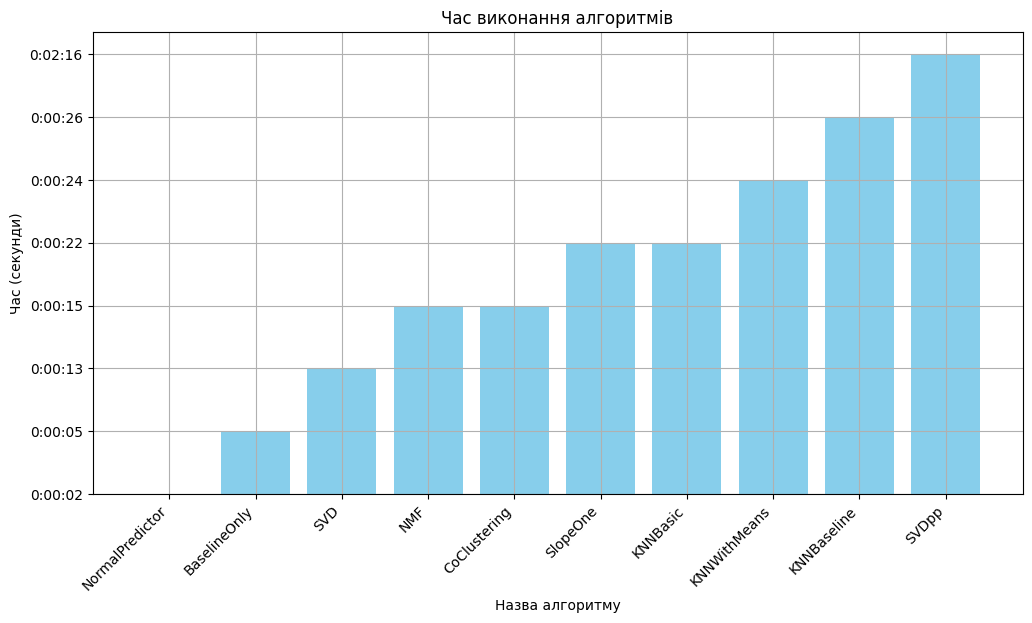

In [60]:
def plot_time_histogram(sorted_results_time):
    algorithm_names = [item[0] for item in sorted_results_time]
    times = [item[3] for item in sorted_results_time]
    plt.figure(figsize=(12, 6))
    plt.bar(algorithm_names, times, color='skyblue')
    plt.xlabel('Назва алгоритму')
    plt.ylabel('Час (секунди)')
    plt.title('Час виконання алгоритмів')
    plt.xticks(rotation=45, ha='right')
    plt.grid(3)
    plt.show()

plot_time_histogram(sorted_results_time)


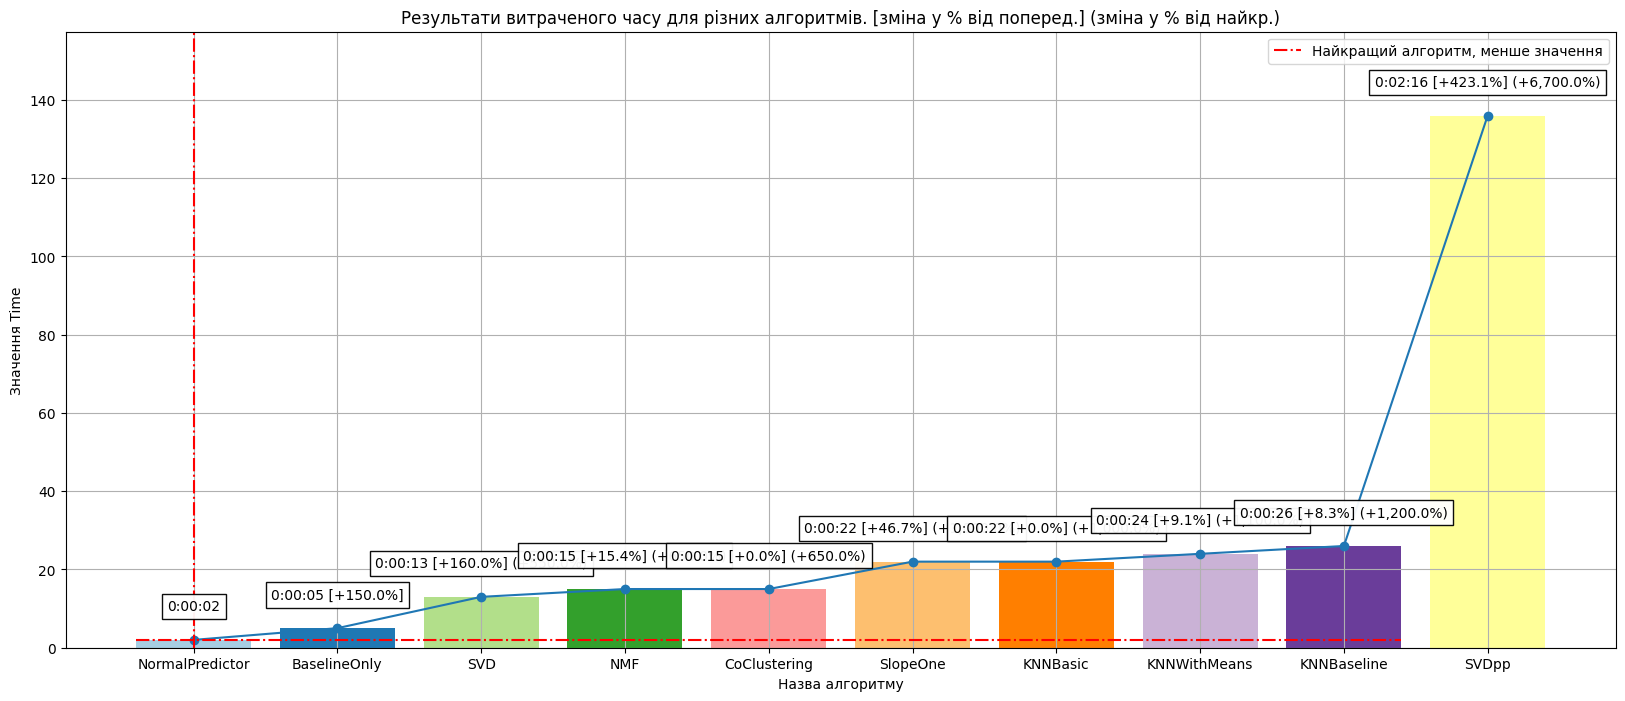

Найкращий алгоритм: NormalPredictor, зі значенням: 2 секунд


In [61]:
import datetime

sorted_results_time_float = [(v[0], v[1], v[2], sum(int(x) * 60 ** i for i, x in enumerate(reversed(v[3].split(':'))))) for v in sorted_results_time]

def plot_algo_time(input_data: list, title_type: str="", ylabel_type: str="Time", column=None):

    x = range(len(input_data))
    if column is None:
        y = [v[3] for v in input_data]
    else:
        y = [v[column] for v in input_data]

    y = np.array(y)

    plt.figure(figsize=(20, 8))
    h_y = y[-1] -  y[0]
    max_y = y[-1] + h_y * 0.16
    min_y = y[0] - h_y * 0.16
    min_y = 0 if min_y < 0 else min_y
    plt.ylim(min_y, max_y)
    plt.title(f"Результати {title_type} для різних алгоритмів. [зміна у % від поперед.] (зміна у % від найкр.)")

    cmap = plt.get_cmap('Paired')
    num_colors = len(x)
    colors_map = [cmap(i / num_colors) for i in range(num_colors)]
    colors = colors_map

    bar_w = 0.8

    plt.bar(x, height=y, width=bar_w, color=colors)
    plt.xticks(x, [v[0] for v in input_data] )
    plt.plot(x, y, "o-")
    plt.xlabel("Назва алгоритму")
    plt.ylabel(ylabel_type)
    plt.vlines(x[0], min_y, max_y, color="red", linestyle="-.", label="Найкращий алгоритм, менше значення")
    plt.hlines(y[0], -bar_w / 2, len(x) - 2 + bar_w / 2, color="red", linestyle="-.")
    diff_y = np.diff(y) / y[:-1] * 100
    diff_y_best = y / y[0] * 100 - 100

    for i, val in enumerate(y):
        # Перетворюємо секунди назад у формат годин:хвилини:секунди
        text = str(datetime.timedelta(seconds=int(val)))
        if i > 0:
            text += f" [{round(diff_y[i-1], 1):+,}%]"
        if i > 1:
            text += f" ({round(diff_y_best[i], 1):+,}%)"

        plt.text(x[i], val + h_y * 0.05 , text, ha='center',  va='bottom', bbox=dict(facecolor='white', alpha=0.95))
    plt.legend(loc="best")
    plt.grid(2)
    plt.show()
    print(f"Найкращий алгоритм: {input_data[0][0]}, зі значенням: {input_data[0][3]} секунд")

plot_algo_time(sorted_results_time_float, "витраченого часу", "Значення Time")


Найкращий алгорим

за точністю предбачення: SVDpp

за часом навчання моделі: NormalPredictor

за часом тестування моделі: NormalPredictor

# Рекомендації

In [62]:
best_algo = SVDpp

In [63]:
from surprise.model_selection import GridSearchCV

param_grid = {"random_state": [SEED],
              "n_epochs": [15, 20], "lr_all": [0.007], "reg_all": [0.02, 0.2]
              }
gs = GridSearchCV(best_algo, param_grid, measures=["rmse"], cv=5, n_jobs=-1)

%time gs.fit(data)


print(gs.best_score["rmse"])

best_params = gs.best_params["rmse"]
print(f"{best_params=}")

CPU times: user 9.45 s, sys: 1.05 s, total: 10.5 s
Wall time: 8min
0.9181393854807919
best_params={'random_state': 42, 'n_epochs': 15, 'lr_all': 0.007, 'reg_all': 0.02}


In [64]:
results_df = pd.DataFrame.from_dict(gs.cv_results)
results_df.head(10)

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_random_state,param_n_epochs,param_lr_all,param_reg_all
0,0.916768,0.914849,0.927945,0.912303,0.918832,0.918139,0.005355,1,34.157242,1.044009,7.353270,0.453586,"{'random_state': 42, 'n_epochs': 15, 'lr_all':...",42,15,0.007,0.02
1,0.945965,0.941886,0.953805,0.942534,0.950280,0.946894,0.004565,4,34.835437,0.512284,7.159032,0.536685,"{'random_state': 42, 'n_epochs': 15, 'lr_all':...",42,15,0.007,0.20
2,0.917717,0.916425,0.929382,0.913487,0.919441,0.919291,0.005408,2,45.794945,1.459003,7.500974,0.196740,"{'random_state': 42, 'n_epochs': 20, 'lr_all':...",42,20,0.007,0.02
3,0.944709,0.940746,0.952904,0.941200,0.949072,0.945726,0.004670,3,46.263067,1.684030,6.538482,0.840125,"{'random_state': 42, 'n_epochs': 20, 'lr_all':...",42,20,0.007,0.20


In [65]:
from collections import defaultdict


def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [66]:
algo = gs.best_estimator["rmse"]

In [67]:
recomendations = 5
top_n = get_top_n(predictions, n=recomendations)

In [68]:
counter=15
print(f"Найкращі рекомендації для перших {counter} користувачів:\n")

for uid, user_ratings in top_n.items():
    recomend = [f"{iid:6}: {'*'*round(est):5} ({est:.2f})" for (iid, est) in user_ratings]
    print(f"Для користувача: {uid:2}, найкращі {recomendations} рекомендацій: {recomend}")
    counter -= 1
    if counter <= 0:
      break


Найкращі рекомендації для перших 15 користувачів:

Для користувача: 1 , найкращі 5 рекомендацій: ['172   : ***** (4.90)', '59    : ****  (4.43)', '19    : ****  (4.32)', '52    : ****  (4.22)', '83    : ****  (4.00)']
Для користувача: 2 , найкращі 5 рекомендацій: ['302   : ****  (4.25)', '286   : ****  (4.20)', '275   : ****  (4.07)', '296   : ****  (3.64)']
Для користувача: 3 , найкращі 5 рекомендацій: ['346   : ***   (3.43)', '340   : ***   (3.25)', '353   : **    (2.32)']
Для користувача: 4 , найкращі 5 рекомендацій: ['301   : ****  (4.44)', '360   : ****  (4.09)']
Для користувача: 5 , найкращі 5 рекомендацій: ['174   : ****  (4.30)', '200   : ***   (3.27)', '210   : ***   (3.10)', '419   : ***   (2.95)', '380   : ***   (2.82)']
Для користувача: 6 , найкращі 5 рекомендацій: ['285   : ****  (4.28)', '182   : ****  (3.89)', '490   : ****  (3.86)', '306   : ****  (3.83)', '496   : ****  (3.70)']
Для користувача: 7 , найкращі 5 рекомендацій: ['357   : ***** (5.00)', '607   : ***** (4.85

In [69]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children            1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [70]:
from tabulate import tabulate

counter = 15

print(f"Найкращі рекомендації для перших {counter} користувачів:\n")

for uid, user_ratings in top_n.items():
    table = []
    for movie_id, rating in user_ratings:
        movie_title = movies_df[movies_df['movieId'] == int(movie_id)]['title'].values
        if movie_title:
            table.append([movie_title[0], round(rating, 2)])
    print(f"Для користувача з ID {uid}:")
    print(tabulate(table, headers=["Фільм", "Рейтинг"], tablefmt="pretty"))
    print('-' * 80)
    counter -= 1
    if counter <= 0:
        break



Найкращі рекомендації для перших 15 користувачів:

Для користувача з ID 1:
+------------------------------------+---------+
|               Фільм                | Рейтинг |
+------------------------------------+---------+
|  Empire Strikes Back, The (1980)   |   4.9   |
|      Three Colors: Red (1994)      |  4.43   |
|       Antonia's Line (1995)        |  4.32   |
| Madness of King George, The (1994) |  4.22   |
|   Much Ado About Nothing (1993)    |   4.0   |
+------------------------------------+---------+
--------------------------------------------------------------------------------
Для користувача з ID 2:
+------------------------------+---------+
|            Фільм             | Рейтинг |
+------------------------------+---------+
|   L.A. Confidential (1997)   |  4.25   |
| English Patient, The (1996)  |   4.2   |
| Sense and Sensibility (1995) |  4.07   |
|     Promesse, La (1996)      |  3.64   |
+------------------------------+---------+
-----------------------------------

In [75]:
from tabulate import tabulate

counter = 15

table = []
for uid, user_ratings in top_n.items():
    user_recomendations = []
    for movie_id, rating in user_ratings:
        movie_title = movies_df[movies_df['movieId'] == int(movie_id)]['title'].values
        if movie_title:
            user_recomendations.append((movie_title[0], round(rating, 2)))
    table.append([f"Користувач {uid}"] + user_recomendations[:5])

headers = ["Користувач"] + ["Фільм, Рейтинг"] * (len(table[0]) - 1)
print(tabulate(table, headers=headers, tablefmt="pretty"))


+----------------+---------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------+----------------------------------------------------------------------+
|   Користувач   |                                    Фільм, Рейтинг                                     |                                    Фільм, Рейтинг                                     |                                    Фільм, Рейтинг                                     |                                      Фільм, Рейтинг                                       |                            Фільм, Рейтинг                            |
+----------------+---------------------------------------------------------------------------------------+--

# Створюємо репорт файл Ydata (pandas-ptofiling)

In [76]:
!pip install ydata-profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 19.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=0182b4131dfd53c976ff033da8f7d4839421410363b5d78b5322e09b77427d63
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [77]:
from ydata_profiling import ProfileReport



In [81]:
df = Dataset.load_builtin('ml-100k', prompt=False)


In [82]:
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.DataFrame(data=df.raw_ratings, columns=["user_id", "item_id", "rating","time"])

profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)


profile.to_file("DS_HW_7_report.html")



/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [83]:
import os
os.path.abspath('DS_HW_7_report.html')


'/content/DS_HW_7_report.html'